# [Maternal Health Risk Data Set - Tập dữ liệu rủi ro sức khỏe bà mẹ](https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set)
# **1.Thông tin tập dữ liệu**
- Loại bài toán: Bài toán phân loại (classification)
- Kích thước dữ liệu: 1013 dòng
- Chiều của dữ liệu: 7 cột
- Dữ liệu đầu vào: Một tập dữ liệu Maternal Health Risk Data Set đã được kiểm tra tính đầy đủ và độ chính xác
- Kết quả đầu ra: Một tập dữ liệu đã được xử lý, phân tích và khai thác để đưa ra những kết luận

**Thông tin tập dữ liệu rủi ro sức khỏe bà mẹ:**
  + Cột 1: Tuổi - **Age**
  + Cột 2: Huyết áp tâm thu - **SystolicBP**
  + Cột 3: Huyết áp tâm trương - **DiastolicBP**
  + Cột 4: Đường huyết - **BS**
  + Cột 5: Nhiệt độ cơ thể - **BodyTemp**
  + Cột 6: Nhịp tim - **HeartRate** 
  + Cột 7: Mức độ rủi ro - **RiskLevel**

➡ *Tất cả những điều này là những yếu tố rủi ro đáng kể và có trách nhiệm đối với tử vong của người mẹ, đó là một trong những mối quan tâm chính của SDG của LHQ.*

**Thông tin thuộc tính:**
+ **Age**: Bất kỳ độ tuổi nào tính theo năm khi phụ nữ mang thai
+ **SystolicBP**: Giá trị trên của Huyết áp tính bằng mmHg, một thuộc tính quan trọng khác trong thời kỳ mang thai.
+ **DiastolicBP**: Giá trị thấp hơn của Huyết áp tính bằng mmHg, một thuộc tính quan trọng khác trong thai kỳ.
+ **BS**: Nồng độ glucose trong máu tính theo nồng độ mmol/L.
+ **BodyTemp**: Thước đo khả năng tạo và thải nhiệt của cơ thể. Đơn vị đo là Độ Fahrenheit (°F)
+ **HeartRate**: Nhịp tim bình thường khi nghỉ ngơi tính bằng nhịp đập của tim mỗi phút.
+ **RiskLevel**: Mức độ rủi ro được dự đoán trong thời kỳ mang thai khi xem xét thuộc tính trước đó.

---
# **Chuẩn bị tập dữ liệu**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set_style('whitegrid')

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Đọc dữ liệu từ file **Maternal Health Risk Data Set.data**, Với các chỉ định của file đọc vào:
- encoding: mặc định là utf-8
- sep: dấu ngăn cách giữa các cột. Mặc định là dấu phẩy (‘,’)
- header: có header(tiêu đề của các cột)

Lúc này:
data sẽ là một đối tượng có hàng, cột gọi là DataFrame.

In [ ]:
# đọc file dữ liệu
data = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/Maternal Health Risk Data Set.csv")
#data.head()
data

In [ ]:
data.shape

**Xem thông tin của data**

Thông tin về Index, kiểu dữ liệu và dung lượng của DataFrame

In [ ]:
data.info()

---
# **2. Phân tích dữ liệu khám phá**
  
**`2.1. Tiền xử lý dữ liệu`**

**Xác định và xử lý các dữ liệu bị thiếu**

In [ ]:
# Xác định các dữ liệu bị thiếu
data.isnull()

In [ ]:
# Đếm các dữ liệu thiếu trong từng cột
data.isnull().sum()

In [ ]:
# Tính giá trị % dữ liệu bị thiếu trong cột
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

***Xem xét dữ liệu có nên bị xóa hay thay thế:***
- nếu dữ liệu bị null nhỏ hơn 10% trong bảng dữ liệu của chúng ta, ta có thể xóa nó
- nếu lớn hơn 10%, ta dùng phương pháp thay thế dữ liệu thiếu.
Tập dử liệu này không có dữ liệu bị thiếu

In [ ]:
# Loại bỏ các dữ liệu bị thiếu
data.dropna(inplace=True)
data

**Xác định và xử lý các bộ giá trị trùng lặp trong data.**

Theo mặc định, đối với mỗi bộ giá trị trùng lặp, lần xuất hiện đầu tiên được đặt thành False và tất cả các giá trị khác thành True

In [ ]:
#Xác định bộ giá trị trùng lặp
data.duplicated() 

In [ ]:
print("Số lượng dữ liệu trùng lặp", len(data[data.duplicated()]))
data[data.duplicated()]

**Loại bỏ các dữ liệu trùng lặp không cần thiết**

In [ ]:
print("Kích thước của Data trước khi xóa các hàng trùng lặp", data.shape)
data = data.drop_duplicates()
data.index = range(len(data))
print("Kích thước của Data sau khi xóa các hàng trùng lặp", data.shape)

**Xác định và Xử lý dữ liệu ngoại lai Outliers**

Phát hiện outliers

***Xác định và xử lý outliers của thuộc tính Age***

In [ ]:
#ngưỡng dưới, ngưỡng trên của biến Tuổi Age
min_threshold, max_threshold = data.Age.quantile([0.01, 0.99])
min_threshold, max_threshold

In [ ]:
#tập dữ liệu trên max_threshold -> outliers
data[data['Age']>max_threshold]

In [ ]:
#tập dữ liệu dưới min_threshold -> outliers
data[data['Age']<min_threshold]

In [ ]:
#xóa outliers
data = data[(data['Age']<max_threshold)&(data['Age']>min_threshold)]
data

***Xác định và xử lý outliers của thuộc tính SystolicBP***

In [ ]:
#Huyết áp tâm thu - SystolicBP
SystolicBP_min_threshold, SystolicBP_max_threshold = data.SystolicBP.quantile([0.01, 0.99])
data = data[(data['SystolicBP']<SystolicBP_max_threshold)&(data['SystolicBP']>SystolicBP_min_threshold)]

***Xác định và xử lý outliers của thuộc tính DiastolicBP***

In [ ]:
#Huyết áp tâm trương - DiastolicBP
DiastolicBP_min_threshold, DiastolicBP_max_threshold = data.DiastolicBP.quantile([0.01, 0.99])
data = data[(data['DiastolicBP']<DiastolicBP_max_threshold)&(data['DiastolicBP']>DiastolicBP_min_threshold)]

***Xác định và xử lý outliers của thuộc tính BS***

In [ ]:
#Đường huyết - BS
BS_min_threshold, BS_max_threshold = data.BS.quantile([0.01, 0.99])
data = data[(data['BS']<BS_max_threshold)&(data['BS']>BS_min_threshold)]

***Xác định và xử lý outliers của thuộc tính BodyTemp***

In [ ]:
#Nhiệt độ cơ thể - BodyTemp
BodyTemp_min_threshold, BodyTemp_max_threshold = data.BodyTemp.quantile([0.01, 0.99])
data = data[(data['BodyTemp']<BodyTemp_max_threshold)&(data['BodyTemp']>BodyTemp_min_threshold)]

***Xác định và xử lý outliers của thuộc tính HeartRate***

In [ ]:
#Nhịp tim - HeartRate
HeartRate_min_threshold, HeartRate_max_threshold = data.HeartRate.quantile([0.01, 0.99])
data = data[(data['HeartRate']<HeartRate_max_threshold)&(data['HeartRate']>HeartRate_min_threshold)]

***Kích thước của tập dữ liệu sau khi đã xử lý outliers***

In [ ]:
data.shape

**Xác đinh và xử lý dữ liệu nhiễu**

In [ ]:
#Xác đinh dữ liệu nhiễu
Noisy_data = data[(data['SystolicBP'] < 0 ) | (data['DiastolicBP'] < 0) | (data['BS'] < 0) | (data['BodyTemp'] < 0) | (data['HeartRate'] < 0)]
Noisy_data

In [ ]:
#Xử lý dữ liệu nhiễu
data = data[(data['SystolicBP'] > 0 ) & (data['DiastolicBP'] > 0) & (data['BS'] > 0) & (data['BodyTemp'] > 0) & (data['HeartRate'] > 0)]
data.shape

**Xuất tập dữ liệu**

In [ ]:
#Xuất tập dữ liệu
data.to_csv('/content/drive/MyDrive/KPDL/GiuaKy/Output.csv', index=False)

**2.2. Khám phá dữ liệu**

  **2.2.1.** Phân tích thống kê mô tả



**Giá trị trung bình**

In [ ]:
data.mean()

**Giá trị trung vị**

In [ ]:
data.median()

**Độ lệch chuẩn**

In [ ]:
data.std()

**Phân vị**

In [ ]:
data.describe()

 **Chuẩn hóa dữ liệu**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Lấy ra các cột dữ liệu cần chuẩn hóa
columns_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Tạo đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa các cột dữ liệu
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# In ra dữ liệu sau khi chuẩn hóa
print(data)

**2.2.2.** Phân tích đơn biến


**Xem xét phân bố của từng biến trong dữ liệu bằng cách sử dụng histogram.**

**Age (Tuổi)**

In [ ]:
maxAge = data['Age'].max()
minAge = data['Age'].min()
plt.hist(data['Age'], bins=15, range=(minAge-1, maxAge))
# Đặt tên cho trục x và trục y
plt.xlabel('Tuổi')
plt.ylabel('Người phụ nữ mang thai')
plt.show()

- Trục x: là số tuổi (Tuổi)
- Trục y: là số người phụ nữ mang thai (Người)

**Nhận xét:**
- Trong khoảng độ tuổi từ 15-18.5 tuổi là khoảng thời gian có nhiều phụ nữ mang thai nhất
- Trong khoảng từ 34 tuổi trở đi có ít phụ nữ mang thai nhất

**=>** Độ tuổi phụ nữ mang thai còn quá trẻ 


**SystolicBP (Huyết áp tâm thu)**


In [ ]:
maxSystolicBP = data['SystolicBP'].max()
minSystolicBP = data['SystolicBP'].min()
plt.xlabel('Huyết áp tâm thu')
plt.ylabel('Người phụ nữ mang thai')
plt.hist(data['SystolicBP'], bins=15, range=(minSystolicBP, maxSystolicBP))
plt.show()

- Trục x : Số đo huyết áp tâm thu (mmHg)
- Trục y : Số người phụ nữ mang thai (Người)

**Nhận xét**
- Số phụ nữ mang thai có huyết áp tâm thu tập trung cao nhất chủ yếu là từ 119-122 mmHg




**DiastolicBP (Huyết áp tâm trương)**

In [ ]:
maxDiastolicBP = data['DiastolicBP'].max()
minDiastolicBP = data['DiastolicBP'].min()
plt.xlabel('Huyết áp tâm trương')
plt.ylabel('Người phụ nữ mang thai')
plt.hist(data['DiastolicBP'], bins=15, range=(minDiastolicBP, maxDiastolicBP))
plt.show()

- Trục x : Số đo huyết áp tâm trương (mmHg)
- Truc y: Số người phụ nữ mang thai (Người)

**Nhận xét:**
- Số phụ nữ mang thai có huyết áp tâm trương cao nhất là 80-82 mmHg

**BS (Đường huyết)**

In [ ]:
maxBS = data['BS'].max()
minBS = data['BS'].min()
plt.xlabel('Đường huyết')
plt.ylabel('Người phụ nữ mang thai')
plt.hist(data['BS'], bins=10, range=(minBS, maxBS))
plt.show()

- Trục x : Số đo đường huyết (mmol/l)
- Trục y : Số người phụ nữ mang thai (Người)

**Nhận xét:**
- Số phụ nữ mang thai có lượng đường huyết từ 2-6 mmol/l là nhiều nhất.

**BodyTemp (Nhiệt độ cơ thể)**

In [ ]:
maxBodyTemp = data['BodyTemp'].max()
minBodyTemp = data['BodyTemp'].min()
plt.xlabel('Nhiệt độ cơ thể')
plt.ylabel('Người phụ nữ mang thai')
plt.hist(data['BodyTemp'], bins=15, range=(minBodyTemp, maxBodyTemp))
plt.show()

- Trục x : Nhiệt độ cơ thể (°F)
- Trục y : Số người phụ nữ mang thai (Người)

**Nhận xét:**
- Số phụ nữ mang thai có nhiệt độ cơ thể từ 98°F - 98.3°F là nhiều nhất

**HeartRate (Nhịp tim)**

In [ ]:
maxHeartRate = data['HeartRate'].max()
minHeartRate = data['HeartRate'].min()
plt.xlabel('Nhịp Tim')
plt.ylabel('Người phụ nữ mang thai')
plt.yticks(range(max(Counter(data['HeartRate']).values()) + 1))
plt.hist(data['HeartRate'])
plt.show()


- Trục x : Nhịp tim (nhịp/phút)
- Trục y : Số người phụ nữ mang thai (người)

**Nhận xét:**
- Số nhụ nữ mang thai có nhịp tim trung bình từ 75-79 (nhịp/phút) là nhiều nhất

**RiskLevel (Độ rủi ro)**

In [ ]:
riskLevel = data['RiskLevel']
# Tính số lần xuất hiện của từng giá trị
counter = Counter(riskLevel)
# Tạo biểu đồ histogram
plt.bar(counter.keys(), counter.values())
plt.xlabel('Độ rủi ro')
plt.ylabel('Người phụ nữ mang thai')
# Chỉ định giá trị cho các nhãn trên trục tung
plt.yticks(range(max(counter.values()) + 1))
# Hiển thị biểu đồ
plt.show()

- Trục x : Mức độ rủi ro 
- Trục y : Số phụ nữ mang  thai (Người)

**Nhận xét:**
- Phần lớn phụ nữ mang thai đều có mức rủi ro trung bình

**2.2.3.** Phân tích đa biến

**Tìm kiếm các mối quan hệ giữa các biến trong dữ liệu bằng cách sử dụng heatmap.**

In [ ]:
import seaborn as sns
data.corr()

<ipython-input-39-8785dfed1c17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)


<Axes: >

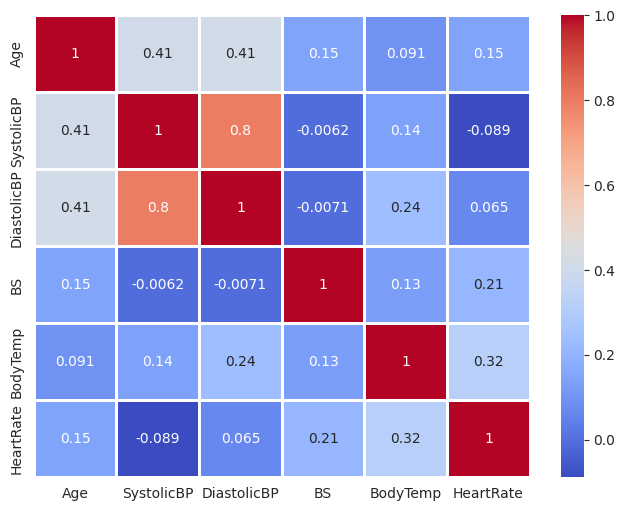

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

Hàm corr trả về độ tương quan giữa các cột có mối liên hệ với nhau:
*   Hệ số tương quan có giá trị âm cho thấy hai biến có mối quan hệ nghịch 
biến hoặc tương quan âm (nghịch biến tuyệt đối khi giá trị bằng -1)
*   Hệ số tương quan có giá trị dương cho thấy mối quan hệ đồng biến hoặc tương quan dương (đồng biến tuyệt đối khi giá trị bằng 1)
*   Tương quan bằng 0 cho hai biến độc lập với nhau. Thông thường độ tương quan để sử dụng nằm trong khoảng 0,8 trở lên

**Nhận xét:**
- Các cặp biến có có hệ số tương quan bằng 1 nên có mối quan hệ đồng biến tuyệt đối như: Age và Age, SystolicBP và SystolicBP, DiastolicBP và DiastolicBP, BS và BS, BodyTemp và BodyTemp, HeartRate và HeartRate
- Các cặp biến có hệ số tương quan âm nên có mối quan hệ nghịch biến hoặc tương quan âm như: SystolicBP và BS, SystolicBP và HeartRate, DiastolicBP và BS.
- Các cặp biến còn lại có hệ số tương quan dương nên đều có mối quan hệ đồng biến hoặc tương quan dương

# **3. Kết luận**

Sau khi tiến hành khai phá tập dữ liệu Maternal Health Risk Data Set ta có kết luận như sau:
- Số phụ nữ mang thai trong độ tuổi 15-18 cao và ở độ tuổi 34 trở lên có rất ít. Huyết áp tâm thu của họ chủ yếu dao động từ 119-122 mmHg và huyết áp tâm trương dao động chủ yếu 80-82 mmHg. Phụ nữ mang thai có lượng đường huyết trong người khoảng từ 2-6 mmol/l và nhiệt độ cơ thể của họ luôn từ 98°F - 98.3°F. Nhịp tim trung bình của phụ nữ mang thai từ 75-79 (nhịp/phút).
- Những người mang thai ở dưới tuổi vị thành niên thì độ rủi ro sẽ rất cao ảnh hưởng không tốt đến sức khỏe và nguy cơ tử vong mẹ vẫn còn cao so với các bà mẹ sinh con ở tuổi trưởng thành. 
- Tuy nhiên, những phụ nữ mang thai sau độ tuổi từ 35 cũng thuộc trường họp rủi ro cao về sức khỏe như huyết áp tăng cao chỉ số huyết áp tâm thu và tâm trương có thể lớn hơn hoặc bằng 140/90mmHg, nguy cơ mắc các bệnh di truyền như Down, cũng như nguy cơ sẩy thai hay gặp phải các vấn đề sản khoa tăng lên theo tuổi của mẹ.

# **THUẬT TOÁN DECISION TREE**

---



**LIỆT KÊ THÔNG TIN CÁC BÀ MẸ CÓ MỨC ĐỘ RỦI RO LÀ "MID RISK"?**

import thư viện pandas và đọc file CSV bằng hàm read_csv().

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/Output.csv")

In [ ]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,29,90,70,8.00,100.0,80,high risk
1,20,120,75,7.01,100.0,70,mid risk
2,30,120,80,6.90,101.0,76,mid risk
3,20,110,60,7.00,100.0,70,mid risk
4,13,90,65,7.80,101.0,80,mid risk
5,30,120,80,7.90,101.0,76,high risk
6,18,120,80,6.90,102.0,76,mid risk
7,17,90,60,6.90,101.0,76,mid risk
8,17,90,63,6.90,101.0,70,mid risk
9,25,120,90,6.70,101.0,80,mid risk


tạo một Decision Tree classifier bằng scikit-learn, và sử dụng phương thức fit() để huấn luyện model trên dữ liệu.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Lấy các features và target từ dataframe
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Tạo classifier và huấn luyện trên dữ liệu
clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

sử dụng model đã huấn luyện để dự đoán mức độ rủi ro cho các bệnh nhân.

In [ ]:
# Dự đoán mức độ rủi ro cho toàn bộ dữ liệu
predictions = clf.predict(X)

# Lọc các bệnh nhân có mức độ rủi ro là "mid risk"
mid_risk_patients = data[predictions == "mid risk"]


lưu các thông tin của các bệnh nhân có mức độ rủi ro là "mid risk" ra file CSV bằng phương thức to_csv() của pandas.

In [ ]:
mid_risk_patients.to_csv("/content/drive/MyDrive/KPDL/GiuaKy/DecisionTree1.csv", index=False)


In [ ]:
DecisionTree1 = pd.read_csv('/content/drive/MyDrive/KPDL/GiuaKy/DecisionTree1.csv')
DecisionTree1

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,20,120,75,7.01,100.0,70,mid risk
1,30,120,80,6.90,101.0,76,mid risk
2,20,110,60,7.00,100.0,70,mid risk
3,13,90,65,7.80,101.0,80,mid risk
4,18,120,80,6.90,102.0,76,mid risk
5,17,90,60,6.90,101.0,76,mid risk
6,17,90,63,6.90,101.0,70,mid risk
7,25,120,90,6.70,101.0,80,mid risk
8,17,120,80,6.70,102.0,76,mid risk
9,13,90,65,7.90,101.0,80,mid risk


**HÃY CHO BIẾT MỨC ĐỘ RỦI RO CỦA BÀ MẸ CÓ AGE LÀ "15" , SYSTOLICBP	LÀ "120",
 DIASTOLICBP	LÀ "80", BS	LÀ "6.60", BODYTEMP	LÀ "99.0", HEARTRATE LÀ "70"?**

import các thư viện cần thiết và đọc dữ liệu từ file csv:

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/KPDL/GiuaKy/Output.csv')


chọn các đặc trưng để sử dụng cho mô hình Decision Tree và tạo hai tập dữ liệu riêng biệt: tập huấn luyện và tập kiểm tra.

In [ ]:
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
X = data[features]
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 sử dụng tập huấn luyện và đánh giá độ chính xác của mô hình trên tập kiểm tra.

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.5


dự đoán mức độ rủi ro của bà mẹ có thông tin như trên.

In [ ]:
# Tạo một DataFrame mới với thông tin của bà mẹ
new_data = pd.DataFrame({'Age': [15], 'SystolicBP': [120], 'DiastolicBP': [80], 'BS': [6.6], 'BodyTemp': [99.0], 'HeartRate': [70]})

# Sử dụng mô hình để dự đoán mức độ rủi ro
risk_level = clf.predict(new_data)

print('Risk level:', risk_level[0])


Risk level: mid risk


 xuất kết quả dự đoán của mô hình vào một file csv mới.

In [ ]:
new_data['RiskLevel'] = risk_level
new_data.to_csv('/content/drive/MyDrive/KPDL/GiuaKy/DecisionTree2.csv', index=False)


In [ ]:
DecisionTree2 = pd.read_csv('/content/drive/MyDrive/KPDL/GiuaKy/DecisionTree2.csv')
DecisionTree2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,15,120,80,6.6,99.0,70,mid risk


# **THUẬT TOÁN LOGISTIC REGRESSION**

## ***liệt kê xác suất mức độ rủi ro (RiskLevel) của các bà mẹ mang thai ở tuổi 17?***

### Import thư viện

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

### Đọc file csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/Output.csv")
df

### Lấy các bản ghi ở tuổi 17 và chỉ lấy cột Age và RiskLevel

In [ ]:
df_17 = df.loc[df['Age'] == 17, ['Age', 'RiskLevel']]

### Chuyển các giá trị của cột RiskLevel thành các giá trị số

In [ ]:
risk_level_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_17['RiskLevel'] = df_17['RiskLevel'].map(risk_level_map)

### Tạo mô hình Logistic Regression

In [ ]:
model = LogisticRegression()

### Tạo X và y từ dataframe

In [ ]:
X = df_17['Age'].values.reshape(-1, 1)
y = df_17['RiskLevel'].values

### Fit mô hình

In [ ]:
model.fit(X, y)

### Dự đoán xác suất mức độ rủi ro cho các bản ghi ở tuổi 17

In [ ]:
y_pred_proba = model.predict_proba(X)

### Thêm cột xác suất vào dataframe

In [ ]:
df_17['Probability of Low Risk'] = y_pred_proba[:, 0]
df_17['Probability of Mid Risk'] = y_pred_proba[:, 1]
df_17['Probability of High Risk'] = y_pred_proba[:, 2]

### Ghi kết quả vào file csv

In [ ]:
df_17.to_csv('/content/drive/MyDrive/KPDL/GiuaKy/LogisticRegression1.csv', index=False)

In [ ]:
LogisticRegression1 = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/LogisticRegression1.csv")
LogisticRegression1

# **Dự đoán xác suất mức độ rủi ro cao nhất cho mỗi giá trị tuổi ?**

### Import thư viện

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Đọc file csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/Output.csv")
df

### Chuẩn bị feature và label cho mô hình

In [ ]:
X = data[['Age']]
y = data['RiskLevel']

### Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Tạo mô hình Logistic Regression và huấn luyện trên tập huấn luyện

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

### Dự đoán xác suất mức độ rủi ro cao nhất cho mỗi giá trị tuổi trong tập kiểm tra

In [ ]:
y_pred = logreg.predict_proba(X_test)
y_pred_highrisk = [p[2] for p in y_pred]

### Tạo dataframe chứa kết quả và xuất ra file csv

In [ ]:
result_df = pd.DataFrame({'Age': X_test.values.ravel(), 'Highest Risk Probability': y_pred_highrisk})
result_df.to_csv('/content/drive/MyDrive/KPDL/GiuaKy/LogisticRegression2.csv', index=False)

### Đọc file csv

In [ ]:
LogisticRegression2 = pd.read_csv("/content/drive/MyDrive/KPDL/GiuaKy/LogisticRegression2.csv")
LogisticRegression2